<a href="https://colab.research.google.com/github/rushirajsherlocked/Gait-Identification/blob/master/Final_of_CASIA_NM_Gender_Resnet34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This is CASIA Dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from fastai.vision import *
from fastai.metrics import error_rate

bs  = 16

path = Path('/content/gdrive/My Drive/GEI_Normal_Walk_(NM)/')

path.ls()

tfms = get_transforms(do_flip=False)


In [4]:
fnames = get_image_files(path/'Male')
fnames[:5]

data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(),num_workers=0).normalize(imagenet_stats)


[PosixPath('/content/gdrive/My Drive/GEI_Normal_Walk_(NM)/Male/073-nm-05-144.png'),
 PosixPath('/content/gdrive/My Drive/GEI_Normal_Walk_(NM)/Male/013-nm-03-072.png'),
 PosixPath('/content/gdrive/My Drive/GEI_Normal_Walk_(NM)/Male/105-nm-06-000.png'),
 PosixPath('/content/gdrive/My Drive/GEI_Normal_Walk_(NM)/Male/115-nm-02-018.png'),
 PosixPath('/content/gdrive/My Drive/GEI_Normal_Walk_(NM)/Male/123-nm-05-144.png')]

['Female', 'Male']

2

1630

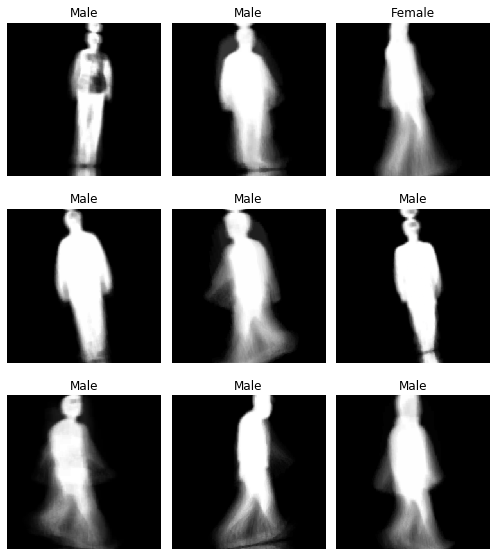

In [0]:
data.show_batch(rows=3, figsize=(7,8))

data.classes

data.c

len(data.valid_ds)

In [0]:
# OLD MODEL - Dont Use it

learn = cnn_learner(data, 
                    models.resnet34, 
                    metrics=accuracy).load("/content/gdrive/My Drive/GEI_Normal_Walk_(NM)/Models/CASIA_NM_Gender")

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
learn.fit_one_cycle(4) 

epoch,train_loss,valid_loss,accuracy,time
0,0.821671,0.373910,0.847853,56:26
1,0.389665,0.227494,0.904294,1:06:22
2,0.271742,0.189702,0.925153,1:04:32
3,0.222099,0.183922,0.927607,1:01:02


In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses() 

len(data.valid_ds)==len(losses)==len(idxs)

True

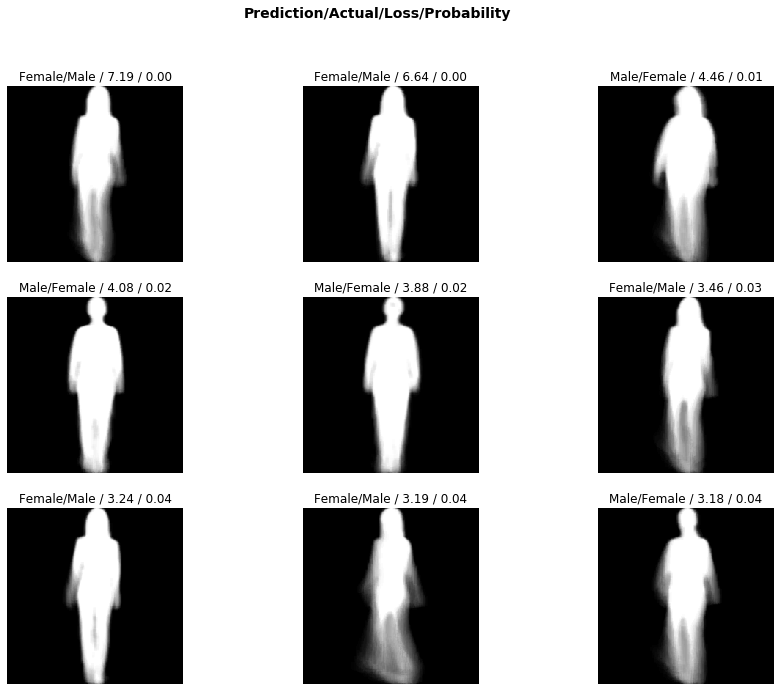

In [0]:
interp.plot_top_losses(9, figsize=(15,11)) 

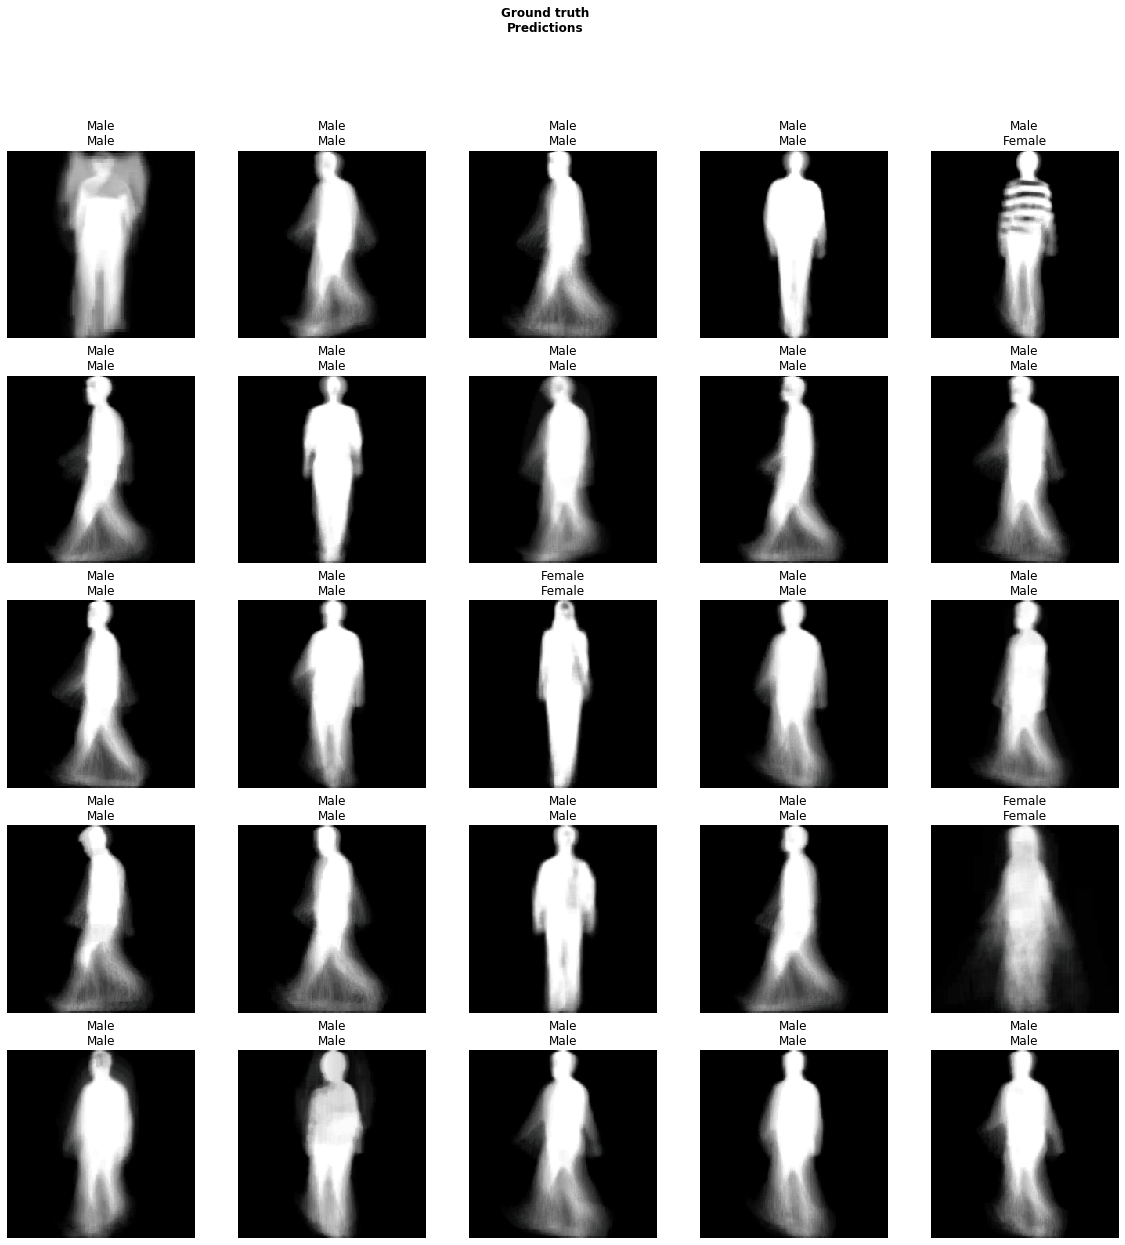

In [0]:
learn.show_results()

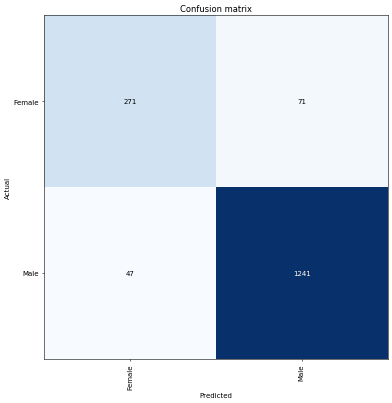

In [0]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=50) 

In [0]:
interp.most_confused(min_val=2)

[('Female', 'Male', 71), ('Male', 'Female', 47)]

In [0]:
learn.save('CASIA_NM_Gender')

In [0]:
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
df = pd.read_csv(path/'Models/cleaned.csv', header='infer')
df

db = (ImageList.from_df(df, path)
                   .random_split_by_pct(0.2)
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch(bs=8))


,name,label
0,Male/083-nm-04-000.png,Male
1,Male/050-nm-02-144.png,Male
2,Male/099-nm-01-126.png,Male
3,Male/035-nm-06-018.png,Male
4,Male/003-nm-01-144.png,Male
...,...,...
6475,Female/043-nm-02-000.png,Female
6476,Female/036-nm-02-144.png,Female
6477,Female/008-nm-06-000.png,Female
6478,Female/012-nm-03-126.png,Female


/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:215: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [0]:
print(data.classes, data.c, len(data.train_ds), len(data.valid_ds))
print(db.classes, db.c, len(db.train_ds), len(db.valid_ds))

['Female', 'Male'] 2 6524 1630
['Female', 'Male'] 2 5184 1296


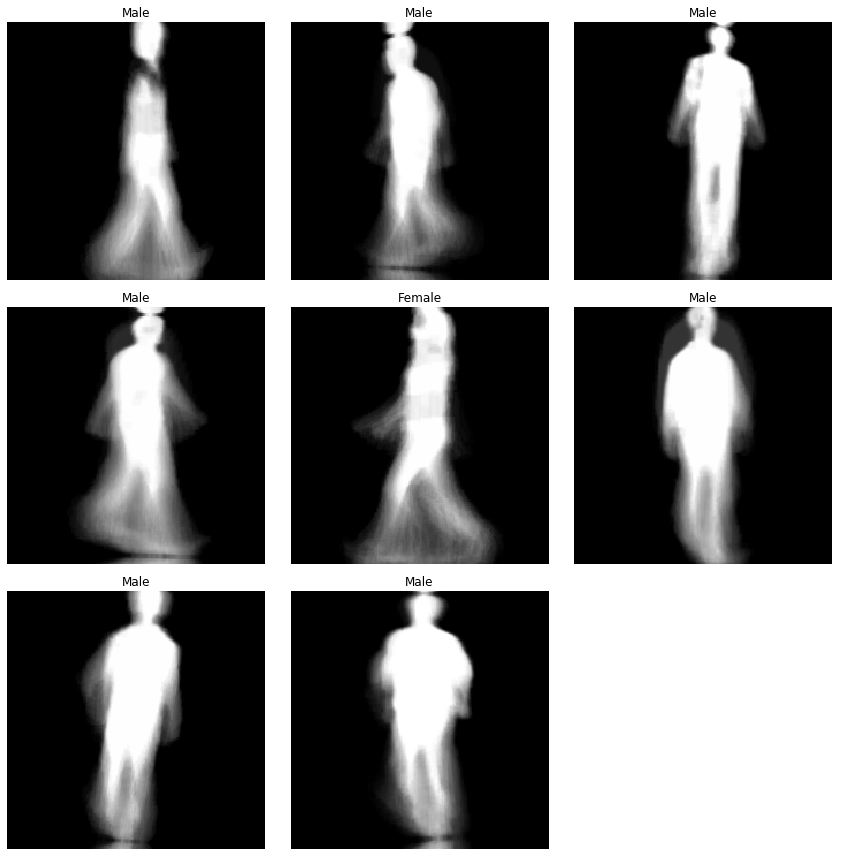

In [0]:
db.show_batch()

In [0]:
learn = cnn_learner(data, 
                    models.resnet34, 
                    metrics=accuracy,callback_fns=ShowGraph,
                    callbacks=callbacks.SaveModelCallback(learn,monitor='accuracy',every='improvement',name = 'CASIA_NM_Gender_Stage-3')).load('/content/gdrive/My Drive/GEI_Normal_Walk_(NM)/Models/CASIA_NM_Gender')


In [0]:
doc(callbacks.EarlyStoppingCallback)

In [0]:
learn.freeze()

epoch,train_loss,valid_loss,accuracy,time
0,0.222580,0.179613,0.928834,02:06
1,0.225684,0.172680,0.938650,02:07
2,0.198802,0.136798,0.943558,02:06
3,0.166746,0.125976,0.958896,02:05
4,0.147607,0.097147,0.966258,02:05
5,0.129067,0.090765,0.968712,02:04


Better model found at epoch 0 with accuracy value: 0.9257668852806091.


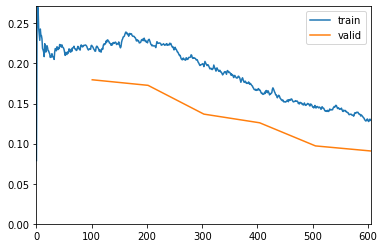

In [0]:
learn.fit_one_cycle(6)

In [0]:
#learn.save('CAISA_NM_Gender_Stage-2') # USE The model name to be saved in the above learner method
                                       # SavedModelCallback function saves the best model from every
                                       # epoch based on the given metrics

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


Better model found at epoch 0 with valid_loss value: 0.16584345698356628.
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.58E-07


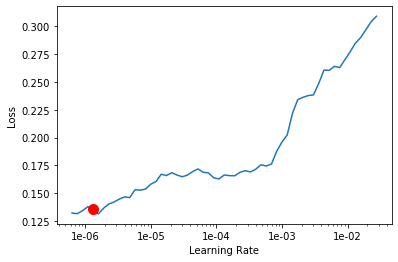

In [0]:
learn.recorder.plot(suggestion = True)

epoch,train_loss,valid_loss,accuracy,time
0,0.159212,0.114981,0.956442,02:27
1,0.154652,0.108465,0.957669,02:27
2,0.146456,0.104862,0.961350,02:26
3,0.154072,0.106005,0.957055,02:26


Better model found at epoch 0 with valid_loss value: 0.16584345698356628.


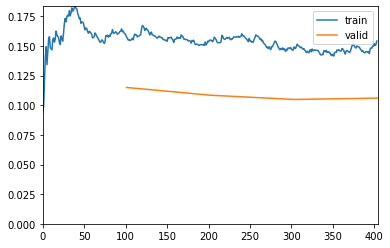

In [0]:
learn.fit_one_cycle(4, max_lr=slice(1.32e-06,1.58e-07))

In [0]:
learn = cnn_learner(data, 
                    models.resnet34, 
                    metrics=accuracy,callback_fns=ShowGraph,
                    callbacks=callbacks.SaveModelCallback(learn,monitor='accuracy',every='improvement',name = 'CASIA_NM_Gender-5(copy)')
                    ).load("/content/gdrive/My Drive/GEI_Normal_Walk_(NM)/models/CASIA_NM_Gender_Stage-3")
learn.data = db # replacing the data


epoch,train_loss,valid_loss,accuracy,time
0,0.173103,0.073755,0.975309,01:20
1,0.182271,0.072771,0.974537,01:19
2,0.183145,0.076355,0.972222,01:21
3,0.151524,0.073776,0.972994,01:20
4,0.191079,0.075174,0.972994,01:20
5,0.222696,0.079001,0.971451,01:21
6,0.184791,0.077985,0.970679,01:20
7,0.199269,0.083488,0.968364,01:20
8,0.193653,0.078953,0.972222,01:19
9,0.188428,0.075811,0.971451,01:19


Better model found at epoch 0 with valid_loss value: 0.07231348752975464.


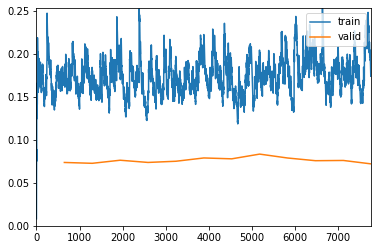

In [0]:
#learn.fit_one_cycle(12, max_lr=slice(1.32e-06,1.00e-06)) 

In [0]:
#learn.save('CASIA_NM_Gender_Stage-3') 

# Unfreeze

In [0]:
learn.unfreeze()

In [0]:
torch.cuda.empty_cache()

In [0]:
#learn.load("/content/gdrive/My Drive/GEI_Normal_Walk_(NM)/models/CASIA_NM_Gender_Stage-3")

In [0]:
learn.load("/content/gdrive/My Drive/GEI_Normal_Walk_(NM)/models/CASIA_NM_Gender_Stage-3")

epoch,train_loss,valid_loss,accuracy,time
0,0.311051,0.205841,0.935185,01:44
1,0.128358,0.063971,0.979167,01:44


Better model found at epoch 0 with accuracy value: 0.7762345671653748.


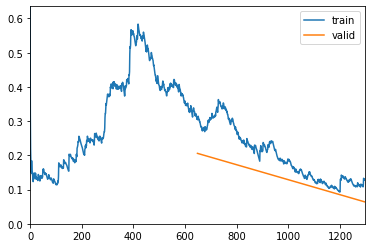

In [0]:
learn.fit_one_cycle(2)           

In [0]:
 learn.lr_find()   # Runs for 20 Epochs and plots the graph of Loss vs LR for each epoch 

epoch,train_loss,valid_loss,accuracy,time


Better model found at epoch 0 with accuracy value: 0.7762345671653748.
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-07
Min loss divided by 10: 4.79E-05


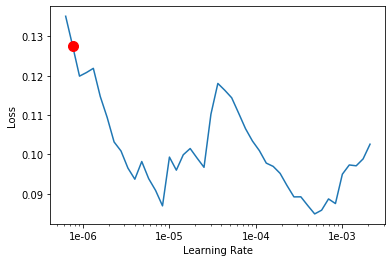

In [0]:
learn.recorder.plot(suggestion = True)  # Runs for 20 Epochs and plots the graph of Loss vs LR for each epoch 
                                 # Can see the trends here and then decide LR accordingly]''

epoch,train_loss,valid_loss,accuracy,time
0,0.113225,0.066455,0.978395,01:44
1,0.140556,0.092897,0.959877,01:44
2,0.180777,0.116471,0.956790,01:43
3,0.111755,0.062379,0.977623,01:44
4,0.069915,0.040154,0.985340,01:44
5,0.060874,0.027457,0.993056,01:43
6,0.059445,0.029169,0.991512,01:44
7,0.063738,0.025790,0.992284,01:44


Better model found at epoch 0 with accuracy value: 0.7762345671653748.


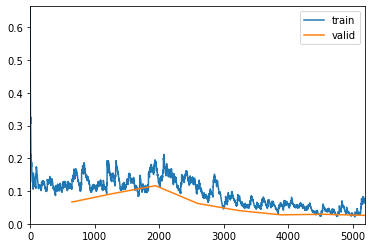

In [0]:
learn.fit_one_cycle(8, max_lr=slice(1e-04,5e-04))

In [0]:
learn.save('CASIA_NM_Gender-5(2)') # This model is 99.28% accurate

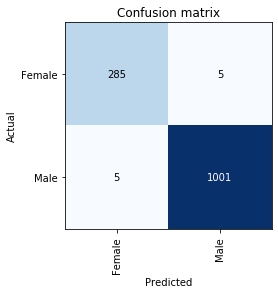

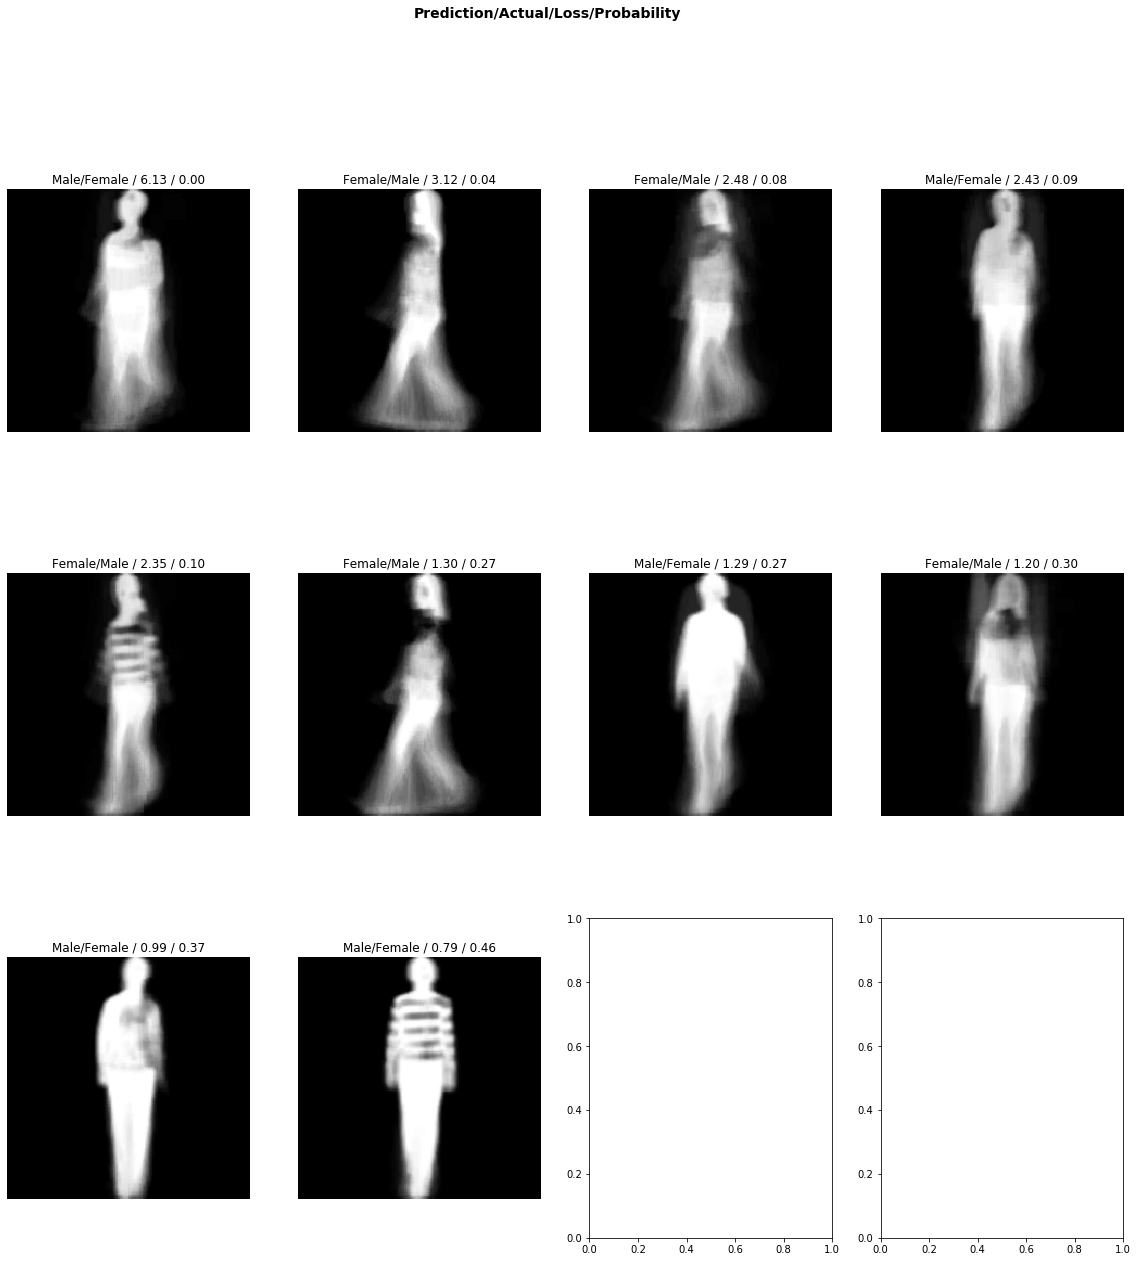

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

interp.plot_top_losses(10, figsize = (20,20))

In [0]:
interp.most_confused(min_val=2)

[('Female', 'Male', 5), ('Male', 'Female', 5)]

In [0]:
# ####### IMPORTANT : This wont Run in COLAB ####

from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path)

In [0]:
df = pd.read_csv(path/'cleaned.csv', header='infer')
df

db = (ImageList.from_df(df, path)
                   .random_split_by_pct(0.2)
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch(bs=8))


# Precision, Recall and AUROC() function

In [14]:
learner = cnn_learner(
    data, 
    models.resnet34, 
    metrics=[accuracy,Precision(average='micro'),Recall(average='micro'),FBeta(average='micro'),AUROC()]
).load("/content/gdrive/My Drive/GEI_Normal_Walk_(NM)/models/CASIA_NM_Gender-5(2)")

learner.fit_one_cycle(4)



epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,auroc,time
0,0.102332,0.080298,0.975460,0.975460,0.975460,0.975460,0.990820,47:52
1,0.096596,0.085684,0.976074,0.976074,0.976074,0.976074,0.991271,01:34
2,0.090185,0.070577,0.977914,0.977914,0.977914,0.977914,0.992588,01:18
3,0.081339,0.067533,0.977914,0.977914,0.977914,0.977914,0.992782,01:18


In [15]:
preds,y, loss = learner.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.9779140949249268 %.


In [17]:
 learner.lr_find()

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,auroc,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.45E-04


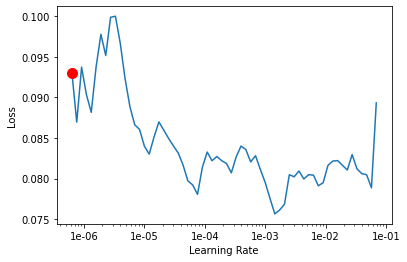

In [18]:
learner.recorder.plot(suggestion = True)

In [20]:
learner.fit_one_cycle(8, max_lr=slice(8e-04,2e-03))

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,auroc,time
0,0.078941,0.065136,0.978528,0.978528,0.978528,0.978528,0.993304,01:18
1,0.081610,0.062451,0.978528,0.978528,0.978528,0.978528,0.994452,01:18
2,0.083932,0.061442,0.979141,0.979141,0.979141,0.979141,0.994435,01:17
3,0.082920,0.055439,0.979141,0.979141,0.979141,0.979141,0.995843,01:17
4,0.075274,0.057651,0.981595,0.981595,0.981595,0.981595,0.995664,01:17
5,0.070339,0.055206,0.982209,0.982209,0.982209,0.982209,0.995831,01:18
6,0.065228,0.050729,0.983436,0.983436,0.983436,0.983436,0.996574,01:17
7,0.060754,0.049408,0.983436,0.983436,0.983436,0.983436,0.996667,01:17


In [0]:
learner.save("CASIA_NM_Gender-6(1)")

In [0]:
learner.unfreeze()

In [24]:
learner.lr_find()

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,auroc,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.09E-05
Min loss divided by 10: 3.02E-06


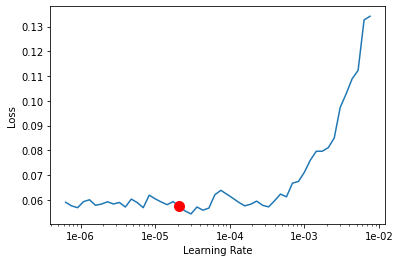

In [26]:
learner.recorder.plot(suggestion = True)

In [27]:
learner.fit_one_cycle(4, max_lr=slice(3e-05,5e-05))

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,auroc,time
0,0.062645,0.047118,0.985276,0.985276,0.985276,0.985276,0.996838,01:24
1,0.059797,0.051047,0.983436,0.983436,0.983436,0.983436,0.996826,01:24
2,0.049257,0.039769,0.985890,0.985890,0.985889,0.985889,0.998037,01:24
3,0.045316,0.042458,0.984663,0.984663,0.984663,0.984663,0.997995,01:25


In [0]:
learner.save("CASIA_NM_Gender-6(2)")

In [0]:
learner.unfreeze()

In [33]:
learner.lr_find()

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,auroc,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 7.59E-08


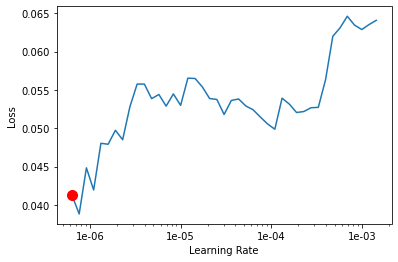

In [34]:
learner.recorder.plot(suggestion = True)

In [35]:
learner.fit_one_cycle(8, max_lr=slice(9.5e-07,7e-07))

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,auroc,time
0,0.052047,0.041976,0.984663,0.984663,0.984663,0.984663,0.997982,01:26
1,0.044397,0.042586,0.984663,0.984663,0.984663,0.984663,0.997977,01:27
2,0.043833,0.041292,0.984049,0.984049,0.984049,0.984049,0.997977,01:28
3,0.041954,0.040828,0.984049,0.984049,0.984049,0.984049,0.998035,01:28
4,0.052479,0.042276,0.984049,0.984049,0.984049,0.984049,0.998017,01:29
5,0.046089,0.041350,0.984663,0.984663,0.984663,0.984663,0.998012,01:29
6,0.044092,0.042600,0.984663,0.984663,0.984663,0.984663,0.998000,01:30
7,0.042088,0.041756,0.984663,0.984663,0.984663,0.984663,0.998010,01:30


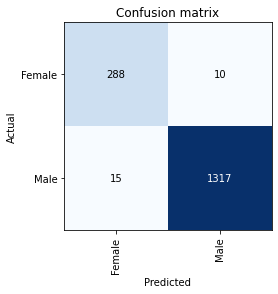

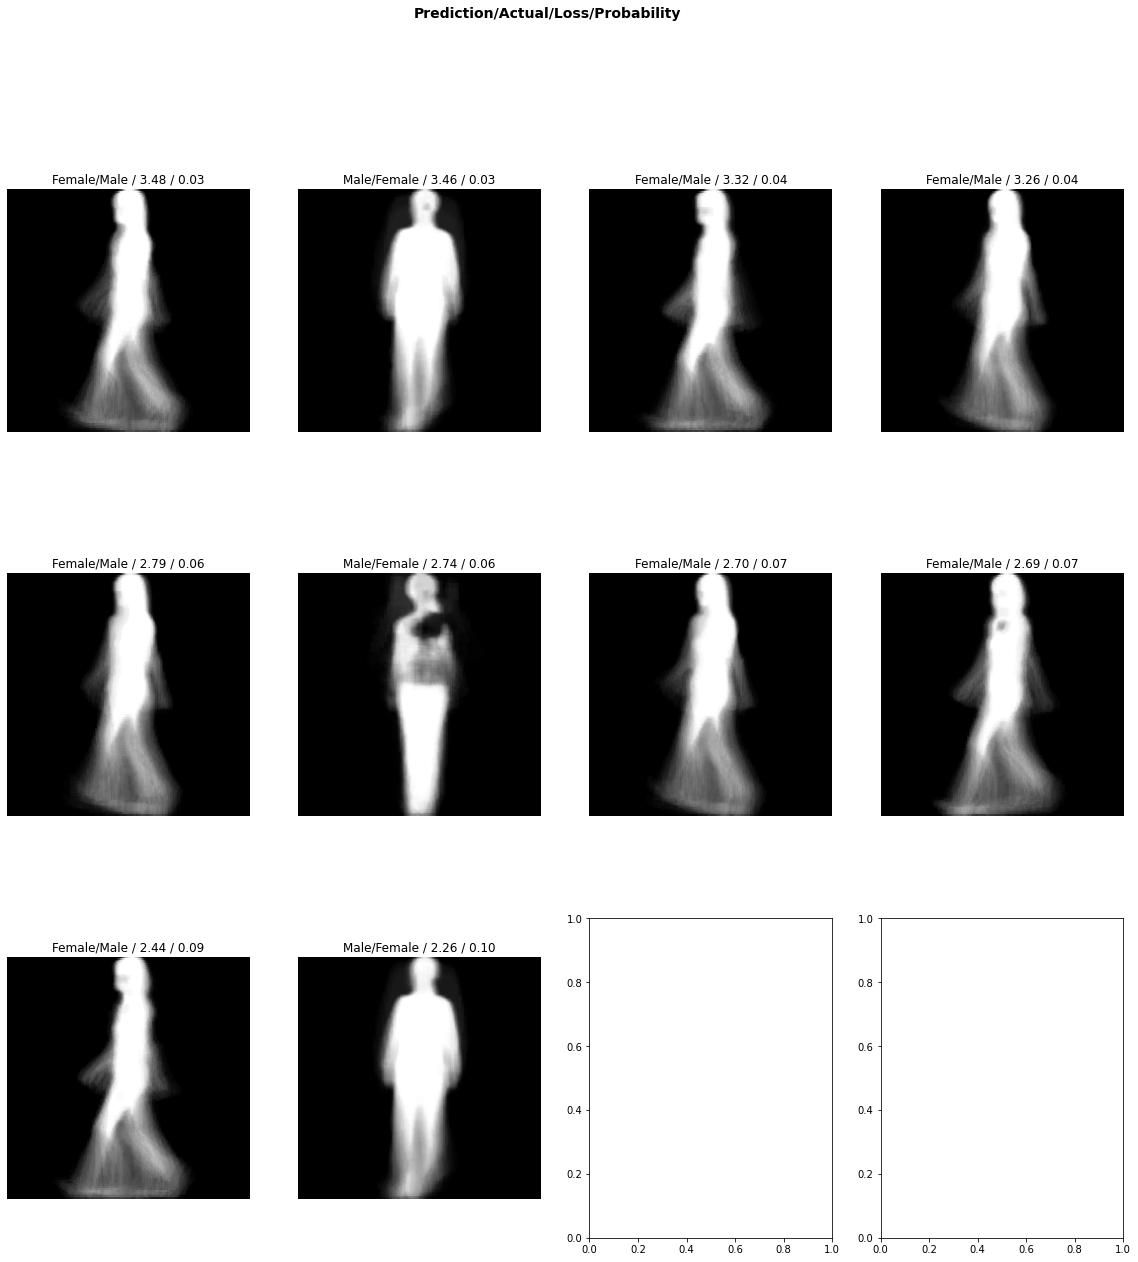

In [40]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

interp.plot_top_losses(10, figsize = (20,20))

# GradCam Visualisation

In [0]:
from fastai.vision import *
from fastai.callbacks.hooks import *
import scipy.ndimage

class GradCam():
    @classmethod
    def from_interp(cls,learn,interp,img_idx,ds_type=DatasetType.Valid,include_label=False):
        # produce heatmap and xb_grad for pred label (and actual label if include_label is True)
        if ds_type == DatasetType.Valid:
            ds = interp.data.valid_ds
        elif ds_type == DatasetType.Test:
            ds = interp.data.test_ds
            include_label=False
        else:
            return None
        
        x_img = ds.x[img_idx]
        xb,_ = interp.data.one_item(x_img)
        xb_img = Image(interp.data.denorm(xb)[0])
        probs = interp.preds[img_idx].numpy()

        pred_idx = interp.pred_class[img_idx].item() # get class idx of img prediction label
        hmap_pred,xb_grad_pred = get_grad_heatmap(learn,xb,pred_idx,size=xb_img.shape[-1])
        prob_pred = probs[pred_idx]
        
        actual_args=None
        if include_label:
            actual_idx = ds.y.items[img_idx] # get class idx of img actual label
            if actual_idx!=pred_idx:
                hmap_actual,xb_grad_actual = get_grad_heatmap(learn,xb,actual_idx,size=xb_img.shape[-1])
                prob_actual = probs[actual_idx]
                actual_args=[interp.data.classes[actual_idx],prob_actual,hmap_actual,xb_grad_actual]
        
        return cls(xb_img,interp.data.classes[pred_idx],prob_pred,hmap_pred,xb_grad_pred,actual_args)
    
    @classmethod
    def from_one_img(cls,learn,x_img,label1=None,label2=None):
        '''
        learn: fastai's Learner
        x_img: fastai.vision.image.Image
        label1: generate heatmap according to this label. If None, this wil be the label with highest probability from the model
        label2: generate additional heatmap according to this label
        '''
        pred_class,pred_idx,probs = learn.predict(x_img)
        label1= str(pred_class) if not label1 else label1
        
        xb,_ = learn.data.one_item(x_img)
        xb_img = Image(learn.data.denorm(xb)[0])
        probs = probs.numpy()
        
        label1_idx = learn.data.classes.index(label1)
        hmap1,xb_grad1 = get_grad_heatmap(learn,xb,label1_idx,size=xb_img.shape[-1])
        prob1 = probs[label1_idx]
        
        label2_args = None
        if label2:
            label2_idx = learn.data.classes.index(label2)
            hmap2,xb_grad2 = get_grad_heatmap(learn,xb,label2_idx,size=xb_img.shape[-1])
            prob2 = probs[label2_idx]
            label2_args = [label2,prob2,hmap2,xb_grad2]
            
        return cls(xb_img,label1,prob1,hmap1,xb_grad1,label2_args)
    
    def __init__(self,xb_img,label1,prob1,hmap1,xb_grad1,label2_args=None):
        self.xb_img=xb_img
        self.label1,self.prob1,self.hmap1,self.xb_grad1 = label1,prob1,hmap1,xb_grad1
        if label2_args:
            self.label2,self.prob2,self.hmap2,self.xb_grad2 = label2_args
            
    def plot(self,plot_hm=True,plot_gbp=True):
        if not plot_hm and not plot_gbp:
            plot_hm=True
        cols = 5 if hasattr(self, 'label2') else 3
        if not plot_gbp or not plot_hm:
            cols-= 2 if hasattr(self, 'label2') else 1

        fig,row_axes = plt.subplots(1,cols,figsize=(cols*5,5))  
        col=0
        size=self.xb_img.shape[-1]
        self.xb_img.show(row_axes[col]);col+=1
        
        label1_title = f'1.{self.label1} {self.prob1:.3f}'
        if plot_hm:
            show_heatmap(self.hmap1,self.xb_img,size,row_axes[col])
            row_axes[col].set_title(label1_title);col+=1
        if plot_gbp:
            row_axes[col].imshow(self.xb_grad1)
            row_axes[col].set_axis_off()
            row_axes[col].set_title(label1_title);col+=1
        
        if hasattr(self, 'label2'):
            label2_title = f'2.{self.label2} {self.prob2:.3f}'
            if plot_hm:
                show_heatmap(self.hmap2,self.xb_img,size,row_axes[col])
                row_axes[col].set_title(label2_title);col+=1
            if plot_gbp:
                row_axes[col].imshow(self.xb_grad2)
                row_axes[col].set_axis_off()
                row_axes[col].set_title(label2_title)
        # plt.tight_layout()
        fig.subplots_adjust(wspace=0, hspace=0)
        # fig.savefig('data_draw/both/gradcam.png')

def minmax_norm(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))
def scaleup(x,size):
    scale_mult=size/x.shape[0]
    upsampled = scipy.ndimage.zoom(x, scale_mult)
    return upsampled

# hook for Gradcam
def hooked_backward(m,xb,target_layer,clas):
    with hook_output(target_layer) as hook_a: #hook at last layer of group 0's output (after bn, size 512x7x7 if resnet34)
        with hook_output(target_layer, grad=True) as hook_g: # gradient w.r.t to the target_layer
            preds = m(xb)
            preds[0,int(clas)].backward() # same as onehot backprop
    return hook_a,hook_g

def clamp_gradients_hook(module, grad_in, grad_out):
    for grad in grad_in:
        torch.clamp_(grad, min=0.0)
        
# hook for guided backprop
def hooked_ReLU(m,xb,clas):
    relu_modules = [module[1] for module in m.named_modules() if str(module[1]) == "ReLU(inplace)"]
    with callbacks.Hooks(relu_modules, clamp_gradients_hook, is_forward=False) as _:
        preds = m(xb)
        preds[0,int(clas)].backward()
        
def guided_backprop(learn,xb,y):
    xb = xb.cuda()
    m = learn.model.eval();
    xb.requires_grad_();
    if not xb.grad is None:
        xb.grad.zero_(); 
    hooked_ReLU(m,xb,y);
    return xb.grad[0].cpu().numpy()

def show_heatmap(hm,xb_im,size,ax=None):
    if ax is None:
        _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.8, extent=(0,size,size,0),
              interpolation='bilinear',cmap='magma');

def get_grad_heatmap(learn,xb,y,size):
    '''
    Main function to get hmap for heatmap and xb_grad for guided backprop
    '''
    xb = xb.cuda()
    m = learn.model.eval();
    target_layer = m[0][-1][-1] # last layer of group 0
    hook_a,hook_g = hooked_backward(m,xb,target_layer,y)
    
    target_act= hook_a.stored[0].cpu().numpy()
    target_grad = hook_g.stored[0][0].cpu().numpy()
    
    mean_grad = target_grad.mean(1).mean(1)
#     hmap = (target_act*mean_grad[...,None,None]).mean(0)
    hmap = (target_act*mean_grad[...,None,None]).sum(0)
    hmap = np.where(hmap >= 0, hmap, 0)
    
    xb_grad = guided_backprop(learn,xb,y) # (3,224,224)        
    #minmax norm the grad
    xb_grad = minmax_norm(xb_grad)
    hmap_scaleup = minmax_norm(scaleup(hmap,size)) # (224,224)
    
    # multiply xb_grad and hmap_scaleup and switch axis
    xb_grad = np.einsum('ijk, jk->jki',xb_grad, hmap_scaleup) #(224,224,3)
    
    return hmap,xb_grad

In [0]:
test_img = '/content/gdrive/My Drive/GEI_Normal_Walk_(NM)/Male/073-nm-05-144.png'
img = open_image(test_img);

In [0]:
type(learn)

In [61]:
type(img)


fastai.vision.image.Image

CPU times: user 116 ms, sys: 241 ms, total: 357 ms
Wall time: 468 ms


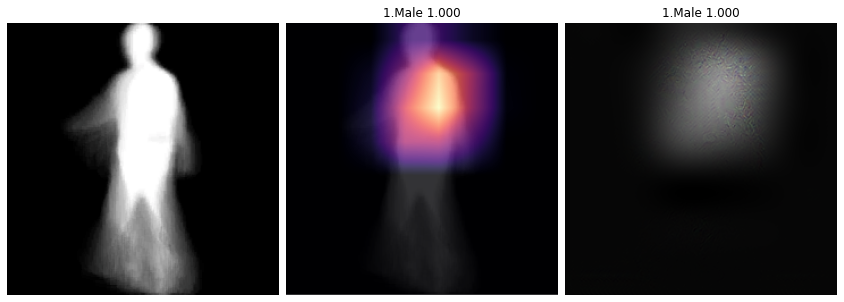

In [63]:
%%time
gcam = GradCam.from_one_img(learner,img)
gcam.plot()


In [0]:
      # Now see the difference in the below 2 cells - IMP!

CPU times: user 77.1 ms, sys: 886 µs, total: 78 ms
Wall time: 78.1 ms


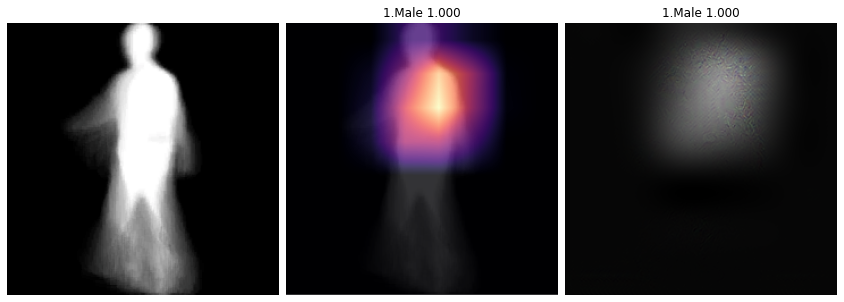

In [69]:
%%time
gcam = GradCam.from_one_img(learner,img,label1='Male')
gcam.plot(plot_hm=True,plot_gbp=True)

CPU times: user 90.4 ms, sys: 1.79 ms, total: 92.2 ms
Wall time: 93.3 ms


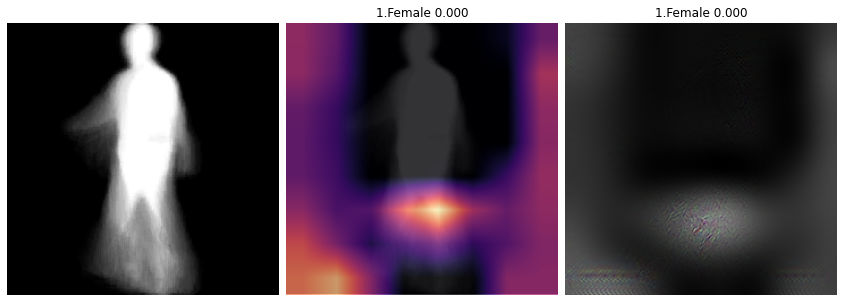

In [68]:
%%time
gcam = GradCam.from_one_img(learner,img,label1='Female')
gcam.plot(plot_hm=True,plot_gbp=True)

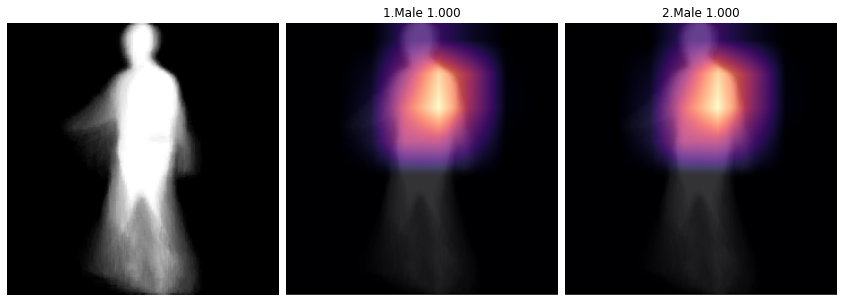

In [71]:
gcam = GradCam.from_one_img(learner,img,label2='Male')
gcam.plot(plot_hm=True,plot_gbp=False)

In [73]:
interp = ClassificationInterpretation.from_learner(learner,ds_type = DatasetType.Valid)


In [74]:
accuracy(interp.preds,torch.tensor(data.valid_ds.y.items))


tensor(0.9847)

In [75]:
interp.most_confused(min_val=2)


[('Male', 'Female', 15), ('Female', 'Male', 10)]

In [0]:
# Investigate top confused classes, e.g Male vs Female


In [76]:
def class2idx(clas):
    return data.classes.index(clas)
classes = data.classes
true_idx,pred_idx = class2idx('Male'),class2idx('Female')
mismatch_idxs =[i for i,(tru,pred) in enumerate(zip(data.valid_ds.y.items,interp.pred_class.numpy())) if tru==true_idx and pred==pred_idx]
len(mismatch_idxs)

15

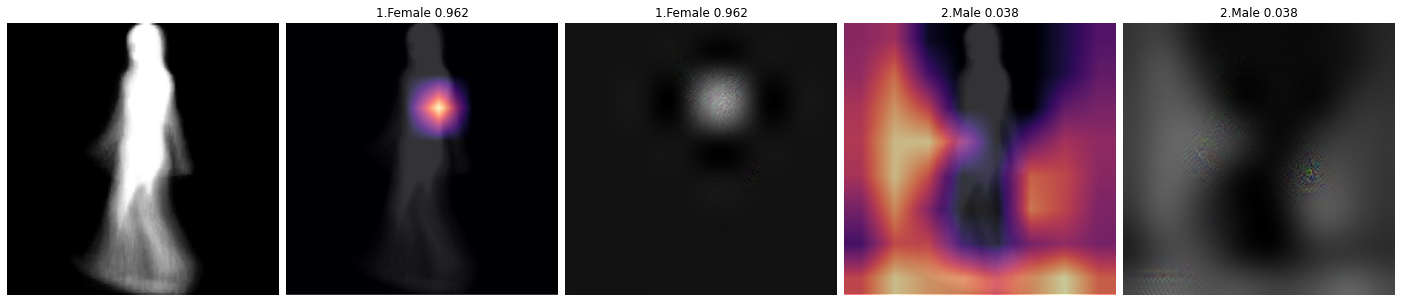

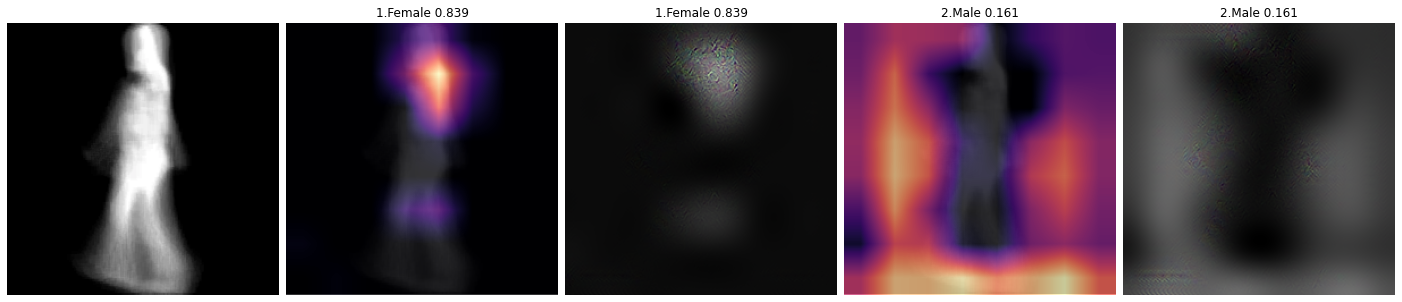

In [78]:
for idx in mismatch_idxs[:2]:
    gcam = GradCam.from_interp(learner,interp,idx,include_label=True)
    gcam.plot()

In [0]:
# Only plot predicted label¶


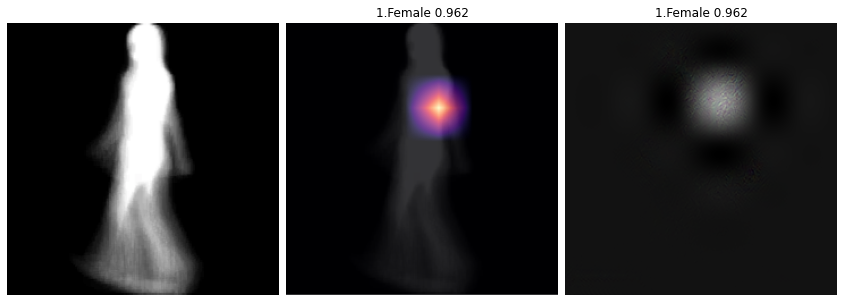

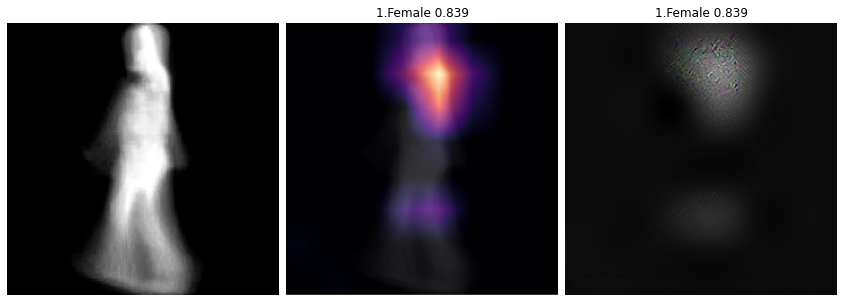

In [80]:
for idx in mismatch_idxs[:2]:
    gcam = GradCam.from_interp(learner,interp,idx,include_label=False)
    gcam.plot()

In [0]:
# From classification interpretation (Test set)¶


In [0]:
interp = ClassificationInterpretation.from_learner(learner,ds_type = DatasetType.Test)

interp.preds.shape


In [0]:
for idx in range(2):
    gcam = GradCam.from_interp(learner,interp,idx,ds_type = DatasetType.Test)
    gcam.plot()


# ROC Curve and AUC

In [56]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.9927822117419434


<Figure size 432x288 with 0 Axes>

(-0.01, 1.0)

(0.0, 1.01)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

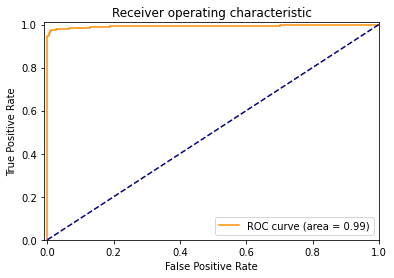

In [54]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

Text(0.5, 1.0, 'Receiver Operating Characteristic')

([<matplotlib.lines.Line2D at 0x7f32f3938b38>],
 [<matplotlib.lines.Line2D at 0x7f32f8034240>])

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

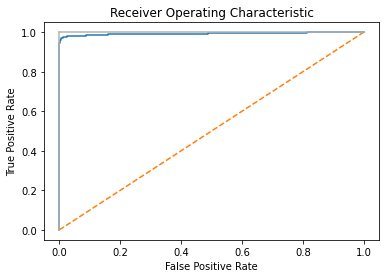

In [59]:
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y, probs, pos_label=1)
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()